In [22]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU Found")


CUDA Available: True
GPU Device Name: NVIDIA GeForce RTX 4050 Laptop GPU


In [23]:
!pip install -q ultralytics


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

In [25]:
dataset_path = r'C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\train'  # Adjust this if you're running from a notebook
yaml_path = os.path.join(dataset_path, r'C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\data.yaml')

In [26]:
with open(yaml_path, 'r') as f:
    print("📄 data.yaml content:\n", f.read())

📄 data.yaml content:
 train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['black stain', 'decayed tooth']

roboflow:
  workspace: sachin-maurya
  project: yolov5-ldpxi-mro6l
  version: 1
  license: CC BY 4.0
  url: https://app.roboflow.com/sachin-maurya/yolov5-ldpxi-mro6l/1


In [27]:
import cv2
import os
import matplotlib.pyplot as plt

def show_sample_images(image_dir, label_dir, num_samples=3):
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))][:num_samples]
    
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Read image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        h, w, _ = image.shape

        # Read label file
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    cls, x_center, y_center, box_width, box_height = map(float, line.strip().split())

                    # Convert YOLO format to pixel coordinates
                    x1 = int((x_center - box_width / 2) * w)
                    y1 = int((y_center - box_height / 2) * h)
                    x2 = int((x_center + box_width / 2) * w)
                    y2 = int((y_center + box_height / 2) * h)

                    # Draw bounding box
                    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(image, f'Class {int(cls)}', (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

        # Show the image
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_file)
        plt.show()


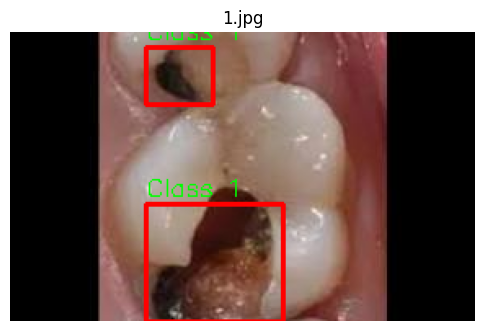

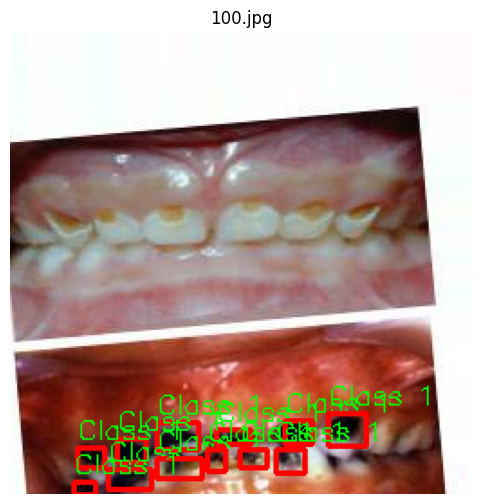

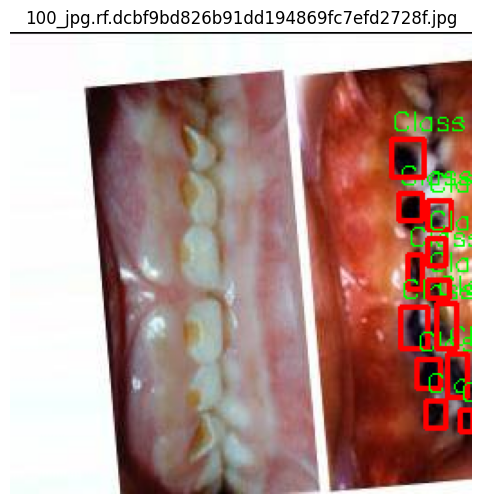

In [28]:
show_sample_images(
    image_dir=os.path.join(dataset_path, r'C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\train\images'),
    label_dir=os.path.join(dataset_path, r'C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\train\labels'),
    num_samples=3
)

In [30]:
import os
import random
import shutil

# ✅ Set seed for reproducibility
random.seed(42)

# ✅ Paths
base_path = r'C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8'
train_img_dir = os.path.join(base_path, 'train/images')
train_lbl_dir = os.path.join(base_path, 'train/labels')

valid_img_dir = os.path.join(base_path, 'valid/images')
valid_lbl_dir = os.path.join(base_path, 'valid/labels')

# ✅ Create validation folders if not exist
os.makedirs(valid_img_dir, exist_ok=True)
os.makedirs(valid_lbl_dir, exist_ok=True)

# ✅ List of image files
image_files = [f for f in os.listdir(train_img_dir) if f.endswith(('.jpg', '.png'))]

# ✅ Shuffle and split (80% train, 20% val)
random.shuffle(image_files)
val_split = int(0.2 * len(image_files))
val_files = image_files[:val_split]

# ✅ Move validation files
for file in val_files:
    img_src = os.path.join(train_img_dir, file)
    lbl_src = os.path.join(train_lbl_dir, file.rsplit('.', 1)[0] + '.txt')

    img_dest = os.path.join(valid_img_dir, file)
    lbl_dest = os.path.join(valid_lbl_dir, file.rsplit('.', 1)[0] + '.txt')

    shutil.move(img_src, img_dest)
    shutil.move(lbl_src, lbl_dest)

print(f"✅ Split complete: {len(val_files)} images moved to validation set.")


✅ Split complete: 244 images moved to validation set.


In [ ]:
# ✅ Load YOLOv8 model
# You can choose from: yolov8n.pt, yolov8s.pt, yolov8m.pt, etc.
model = YOLO('yolov8n.pt')  # lightweight model, good for quick training

# ✅ Train the model
results = model.train(
    data=os.path.join(dataset_path, r'C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\data.yaml'),  # path to your data.yaml
    epochs=50,                # increase if needed
    imgsz=640,                # input image size (standard for YOLO)
    batch=16,                 
    workers=2,                # data loading workers
    project='YOLOv8_Training',
    name='teeth_stain_detection',
    verbose=True
)

# ✅ Optionally, print the results directory
print(f"\nTraining completed. Results saved to: {results.save_dir}")


Ultralytics 8.3.174  Python-3.9.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=teeth_stain_detection7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

train: Scanning C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\train\labels... 980 images, 2 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<00:00, 1710.56it/s]


train: New cache created: C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 97.020.0 MB/s, size: 8.6 KB)


val: Scanning C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\valid\labels... 244 images, 2 backgrounds, 0 corrupt: 100%|██████████| 244/244 [00:00<00:00, 1351.01it/s]


val: New cache created: C:\Users\Sachin Maurya\Downloads\yolov5.v1i.yolov8\valid\labels.cache
Plotting labels to YOLOv8_Training\teeth_stain_detection7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to YOLOv8_Training\teeth_stain_detection7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.01G      2.421      3.363      1.828         24        640: 100%|██████████| 62/62 [00:16<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        244        915      0.828      0.055     0.0977     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.31G      2.289      2.631      1.739         20        640: 100%|██████████| 62/62 [00:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  4.00it/s]


                   all        244        915      0.326      0.222      0.159     0.0523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.31G       2.29      2.452      1.695         34        640: 100%|██████████| 62/62 [00:10<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.29it/s]

                   all        244        915      0.197      0.123      0.105     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.32G      2.249      2.291      1.692         23        640: 100%|██████████| 62/62 [00:10<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.81it/s]

                   all        244        915      0.282      0.225      0.174     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.32G      2.221      2.129       1.65         20        640: 100%|██████████| 62/62 [00:10<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]

                   all        244        915      0.501      0.262      0.263        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.32G      2.229      2.114      1.657          8        640: 100%|██████████| 62/62 [00:10<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        244        915      0.487      0.342      0.332      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.32G      2.187      1.994      1.624         25        640: 100%|██████████| 62/62 [00:10<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]

                   all        244        915      0.481      0.409      0.388      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.32G      2.209      1.872      1.575         18        640: 100%|██████████| 62/62 [00:10<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]

                   all        244        915      0.677      0.358      0.429      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.32G      2.139       1.81      1.571         26        640: 100%|██████████| 62/62 [00:10<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        244        915      0.501      0.442      0.437      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.32G      2.144      1.796      1.594          9        640: 100%|██████████| 62/62 [00:11<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.94it/s]

                   all        244        915      0.559      0.446       0.44      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.32G      2.112      1.703      1.557         13        640: 100%|██████████| 62/62 [00:10<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]

                   all        244        915      0.546      0.479      0.479      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G      2.129      1.734      1.553         20        640: 100%|██████████| 62/62 [00:10<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        244        915       0.54      0.431      0.447      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.32G      2.141      1.666      1.561         10        640: 100%|██████████| 62/62 [00:10<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

                   all        244        915      0.552      0.451      0.489      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.32G      2.086      1.653      1.552         32        640: 100%|██████████| 62/62 [00:10<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.00it/s]

                   all        244        915      0.566      0.467      0.493      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.32G      2.071      1.618      1.522         16        640: 100%|██████████| 62/62 [00:10<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.97it/s]

                   all        244        915      0.615      0.496      0.519        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.32G      2.076      1.573      1.523         38        640: 100%|██████████| 62/62 [00:10<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]

                   all        244        915      0.623      0.476       0.53      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.32G      2.059      1.524      1.491         34        640: 100%|██████████| 62/62 [00:10<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        244        915      0.609      0.457      0.511      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.32G       2.04      1.538      1.517         24        640: 100%|██████████| 62/62 [00:10<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.91it/s]

                   all        244        915      0.597      0.541      0.552      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.32G       2.02      1.521      1.482          8        640: 100%|██████████| 62/62 [00:10<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

                   all        244        915      0.647      0.526      0.576      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.32G      1.991      1.495      1.489         32        640: 100%|██████████| 62/62 [00:10<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.97it/s]

                   all        244        915      0.594      0.547      0.539      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.32G      2.024      1.441      1.501         13        640: 100%|██████████| 62/62 [00:10<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        244        915      0.653      0.497      0.554       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.32G      1.955      1.421       1.47         21        640: 100%|██████████| 62/62 [00:09<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.97it/s]

                   all        244        915      0.614      0.523      0.566      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.32G      1.991       1.46      1.467         21        640: 100%|██████████| 62/62 [00:10<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]

                   all        244        915      0.664      0.583      0.626      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.32G      1.965      1.399      1.452         22        640: 100%|██████████| 62/62 [00:10<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]

                   all        244        915      0.655      0.515      0.565      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.32G      1.972      1.412      1.449         18        640: 100%|██████████| 62/62 [00:10<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.02it/s]

                   all        244        915      0.642      0.545      0.586      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.32G      1.968      1.385       1.47         37        640: 100%|██████████| 62/62 [00:10<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]

                   all        244        915      0.653      0.539      0.577       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.32G      1.939      1.351      1.457         12        640: 100%|██████████| 62/62 [00:10<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]

                   all        244        915      0.654      0.607      0.636       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.32G      1.932      1.328      1.429         14        640: 100%|██████████| 62/62 [00:10<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.77it/s]

                   all        244        915      0.683      0.568      0.623      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.32G      1.918      1.294      1.418         31        640: 100%|██████████| 62/62 [00:10<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]

                   all        244        915      0.696      0.549      0.611      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.32G      1.933      1.345      1.438         10        640: 100%|██████████| 62/62 [00:10<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.93it/s]

                   all        244        915      0.691      0.563      0.623      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.32G      1.867      1.264      1.403          8        640: 100%|██████████| 62/62 [00:10<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.77it/s]

                   all        244        915      0.688      0.587      0.629      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.32G      1.879       1.25      1.413         12        640: 100%|██████████| 62/62 [00:10<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.91it/s]

                   all        244        915      0.661      0.565      0.616      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.32G      1.875      1.239      1.387         21        640: 100%|██████████| 62/62 [00:10<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.81it/s]

                   all        244        915      0.695      0.567      0.625      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.32G       1.86      1.231        1.4         39        640: 100%|██████████| 62/62 [00:09<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        244        915      0.691      0.588      0.643      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.32G      1.831      1.234       1.38         19        640: 100%|██████████| 62/62 [00:10<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.03it/s]

                   all        244        915      0.727      0.597       0.66      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.32G      1.809       1.16      1.377         21        640: 100%|██████████| 62/62 [00:09<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]

                   all        244        915        0.7      0.589       0.65      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.32G      1.838      1.187       1.38         26        640: 100%|██████████| 62/62 [00:10<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]

                   all        244        915        0.7      0.622      0.659      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.32G      1.804      1.175      1.365         36        640: 100%|██████████| 62/62 [00:10<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        244        915       0.72      0.613      0.662      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.32G      1.819      1.158       1.37         16        640: 100%|██████████| 62/62 [00:10<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.91it/s]

                   all        244        915      0.706      0.609      0.656      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.32G      1.815       1.14      1.371         38        640: 100%|██████████| 62/62 [00:10<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]

                   all        244        915      0.723      0.622      0.669      0.293


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.32G      1.779      1.092      1.389         21        640: 100%|██████████| 62/62 [00:10<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.97it/s]

                   all        244        915      0.719      0.602       0.66      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.32G      1.741      1.074      1.371          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.12it/s]

                   all        244        915      0.738      0.639      0.683      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.32G       1.75      1.043      1.377         35        640: 100%|██████████| 62/62 [00:09<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.89it/s]

                   all        244        915       0.72      0.635      0.683      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G      1.729       1.04      1.368         16        640: 100%|██████████| 62/62 [00:09<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

                   all        244        915      0.728      0.617      0.672      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.32G      1.714      1.037       1.37         17        640: 100%|██████████| 62/62 [00:09<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.12it/s]

                   all        244        915      0.716      0.643      0.684      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.32G      1.718      1.043      1.358         12        640: 100%|██████████| 62/62 [00:09<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.02it/s]

                   all        244        915      0.719      0.635      0.685      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.32G      1.683     0.9981      1.353         25        640: 100%|██████████| 62/62 [00:09<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        244        915      0.729      0.642      0.692      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.32G        1.7     0.9965      1.343         13        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

                   all        244        915      0.755       0.63      0.698      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.32G      1.668      0.981      1.333         10        640: 100%|██████████| 62/62 [00:09<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

                   all        244        915      0.734       0.65      0.693      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.32G      1.639     0.9499      1.307          8        640: 100%|██████████| 62/62 [00:09<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        244        915      0.738      0.649        0.7      0.305



50 epochs completed in 0.172 hours.
Optimizer stripped from YOLOv8_Training\teeth_stain_detection7\weights\last.pt, 6.2MB
Optimizer stripped from YOLOv8_Training\teeth_stain_detection7\weights\best.pt, 6.2MB

Validating YOLOv8_Training\teeth_stain_detection7\weights\best.pt...
Ultralytics 8.3.174  Python-3.9.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]


                   all        244        915       0.74      0.649        0.7      0.305
           black stain         83        433       0.66      0.547      0.578      0.233
         decayed tooth        183        482      0.821       0.75      0.822      0.377
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to YOLOv8_Training\teeth_stain_detection7

Training completed. Results saved to: YOLOv8_Training\teeth_stain_detection7
